## Load the Data 
After coding the interview transcripts using Excel, import the contents into a DataFrame for easier data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls= pd.ExcelFile('./code.xlsx')

In [3]:
dfs = {sheet_name: pd.read_excel(xls, sheet_name=sheet_name) for sheet_name in xls.sheet_names}

In [4]:
for sheet_name, df in dfs.items():
    df['Interviewee'] = 'Participant' + sheet_name[9:]

In [5]:
combined_df = pd.concat(dfs.values(), ignore_index=True) # ignore_index=True 重新索引合并后的结果，确保行索引是唯一的。

In [6]:
combined_df.head()

,Theme,Primary Code,Secondary Code,Attitude,Supporting Quotes,Interviewee
0,General Information,Location,Southwest of Ireland,NaN,"""Yeah, I live in the southwest of Ireland, in ...",Participant1
1,General Information,Car ownership,Car ownership,NaN,"""Our house has two cars. We live in rural Irel...",Participant1
2,General Information,Car usage,NaN,NaN,NaN,Participant1
3,Car Sharing Attitudes,Willingness to share,Willingness to share,Posotive,"""Would you consider sharing your car for let's...",Participant1
4,Car Sharing Attitudes,Reasons for sharing,Utilization of idle resources,NaN,"""I think to recoup some of the investment in t...",Participant1


In [7]:
interviewee = pd.read_excel('interviewee.xlsx')
interviewee.head(3)   

,Interviewee,Car Ownership,Role,Gender
0,Participant1,Yes,Employed,Male
1,Participant2,Yes,Employed,Male
2,Participant3,Yes,Employed,Male


In [8]:
df = combined_df.drop(columns=['Supporting Quotes', 'Attitude']) # 方便后续更改
df = df.loc[df['Theme']!='General Information']
# df['code']=df['Primary Code'].str.cat(df['Seconday Code'], sep='-')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 3 to 383
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Theme           327 non-null    object
 1   Primary Code    327 non-null    object
 2   Secondary Code  291 non-null    object
 3   Interviewee     327 non-null    object
dtypes: object(4)
memory usage: 12.8+ KB


In [10]:
# df['Primary Code']=df['Primary Code'].astype('category')
# df['Secondary Code'] = df['Secondary Code'].astype('category')
# df['Theme'] = df['Theme'].astype('category')
# df['Interviewee'] = df['Interviewee'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 3 to 383
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Theme           327 non-null    object
 1   Primary Code    327 non-null    object
 2   Secondary Code  291 non-null    object
 3   Interviewee     327 non-null    object
dtypes: object(4)
memory usage: 12.8+ KB


## Data Cleaning
The step focus on two aspects: structure and content, addressing tidiness and cleanliness.  
Structural issues pertain to data that does not adhere to the principles of "each variable as a column, each observation as a row, and each type of observational unit forms a table."  Since the excel columns are designed correctly, I will focus solely on the content aspect.
Content issues include missing data, duplicate data, invalid data, and other data quality concerns.

In [12]:
df.sample(5)

,Theme,Primary Code,Secondary Code,Interviewee
332,Technology in Car Sharing,IoT and other technologies,Emergency response,Participant17
129,Car Sharing Attitudes,Willingness to share,Willingness to share,Participant8
273,Car Sharing Attitudes,Concerns about sharing,NaN,Participant15
162,Privacy and Information Needs,Information preferences,Insurance,Participant9
336,Car Sharing Attitudes,Willingness to share,NaN,Participant18


In [13]:
len(df.loc[df['Primary Code']=='Willingness to share'])

19

In [14]:
len(df.loc[df['Primary Code']!='Willingness to share'])

308

In [15]:
filtered_df = df.loc[df['Primary Code']!='Willingness to share'] # 需要以这个为基础做codebook
# filtered_df = df.drop(['Primary Code']=='Willingness to share') drop不能用条件表达式
display(filtered_df.shape)

(308, 4)

In [16]:
filtered_df['Theme'].value_counts()

Theme
Privacy and Information Needs      85
Decision-Making Factors            73
Car Sharing Attitudes              60
Billing and Pricing Preferences    55
Technology in Car Sharing          35
Name: count, dtype: int64

In [17]:
filtered_df['Primary Code'].value_counts()

Primary Code
Information preferences         59
Factors influencing decision    54
Pricing factors                 36
IoT and other technologies      35
Reasons for sharing             31
Concerns about sharing          29
Privacy concerns                26
Car hire vs. car sharing        19
Billing preferences             19
Name: count, dtype: int64

In [18]:
# pd.set_option('display.max_rows', None)
filtered_df['Secondary Code'].value_counts()

Secondary Code
Car condition               23
Price                       12
Cost-benefit analysis       11
Case-by-case basis          11
Car tracking                10
                            ..
Safety                       1
Privacy concerns             1
Neighborhood Disturbance     1
Car location                 1
Privacy policy               1
Name: count, Length: 69, dtype: int64

In [19]:
# filtered_df.to_excel('filtered_df.xlsx', index=False)  # index=False表示不保存行索引

### Check data inconsstency in every Primary Code

In [20]:
grouped_df = filtered_df.groupby(['Primary Code','Secondary Code'])
display(grouped_df.size().unique()) # len(grouped_df)是用来看分组后的组数,size()是用来看每个组的行数

array([ 5,  6,  1,  3, 11,  4,  2,  7, 12,  8, 10,  9])

In [21]:
# grouped_df.get_group(('Factors influencing decision',)) # DataFrameGroupBy' object has no attribute 'loc'

In [22]:
grouped_df.apply(lambda x : x if x.name[0]=='Factors influencing decision'else None)

Theme  \
Primary Code                 Secondary Code                                                 
Factors influencing decision Accessibility of service points 27   Decision-Making Factors   
                                                             80   Decision-Making Factors   
                                                             135  Decision-Making Factors   
                                                             173  Decision-Making Factors   
                                                             276  Decision-Making Factors   
                                                             344  Decision-Making Factors   
                             Car condition                   78   Decision-Making Factors   
                                                             195  Decision-Making Factors   
                                                             219  Decision-Making Factors   
                                                             279  Decision-Making Factors   
                                                             342  Decision-Making Factors   
                                                             345  Decision-Making Factors   
                             Car history                     220  Decision-Making Factors   
                             Convenience                     9    Decision-Making Factors   
                                                             194  Decision-Making Factors   
                                                             255  Decision-Making Factors   
                                                             275  Decision-Making Factors   
                                                             300  Decision-Making Factors   
                                                             323  Decision-Making Factors   
                                                             340  Decision-Making Factors   
                             Ease of use                     76   Decision-Making Factors   
                                                             198  Decision-Making Factors   
                             Flexibility                     278  Decision-Making Factors   
                                                             341  Decision-Making Factors   
                             Insurance                       79   Decision-Making Factors   
                                                             197  Decision-Making Factors   
                             Legitimacy                      81   Decision-Making Factors   
                             Membership                      11   Decision-Making Factors   
                             Payment                         134  Decision-Making Factors   
                             Price                           10   Decision-Making Factors   
                                                             26   Decision-Making Factors   
                                                             82   Decision-Making Factors   
                                                             113  Decision-Making Factors   
                                                             196  Decision-Making Factors   
                                                             218  Decision-Making Factors   
                                                             256  Decision-Making Factors   
                                                             277  Decision-Making Factors   
                                                             301  Decision-Making Factors   
                                                             322  Decision-Making Factors   
                                                             343  Decision-Making Factors   
                                                             368  Decision-Making Factors   
                             Reviews                         216  Decision-Making Fac

In [23]:
grouped_df.apply(lambda x : x if x.name[0]=='Information preferences'else None)

Theme  \
Primary Code            Secondary Code                                            
Information preferences Car availability     286  Privacy and Information Needs   
                                             353  Privacy and Information Needs   
                        Car condition        32   Privacy and Information Needs   
                                             103  Privacy and Information Needs   
                                             121  Privacy and Information Needs   
                                             181  Privacy and Information Needs   
                                             284  Privacy and Information Needs   
                                             352  Privacy and Information Needs   
                        Car history          285  Privacy and Information Needs   
                        Car location         119  Privacy and Information Needs   
                        Car usage            102  Privacy and Information Needs   
                                             161  Privacy and Information Needs   
                                             380  Privacy and Information Needs   
                        Contact information  52   Privacy and Information Needs   
                        Driving history      123  Privacy and Information Needs   
                                             144  Privacy and Information Needs   
                                             178  Privacy and Information Needs   
                                             227  Privacy and Information Needs   
                                             263  Privacy and Information Needs   
                                             311  Privacy and Information Needs   
                                             351  Privacy and Information Needs   
                                             381  Privacy and Information Needs   
                        In-person assessment 229  Privacy and Information Needs   
                        Insurance            122  Privacy and Information Needs   
                                             145  Privacy and Information Needs   
                                             162  Privacy and Information Needs   
                        Legitimacy           376  Privacy and Information Needs   
                        License              143  Privacy and Information Needs   
                                             179  Privacy and Information Needs   
                                             375  Privacy and Information Needs   
                                             379  Privacy and Information Needs   
                        Owner verification   283  Privacy and Information Needs   
                                             350  Privacy and Information Needs   
                        Payment              182  Privacy and Information Needs   
                        Privacy policy       356  Privacy and Information Needs   
                        Ratings              330  Privacy and Information Needs   
                        Rental terms         287  Privacy and Information Needs   
                                             354  Privacy and Information Needs   
                                             377  Privacy and Information Needs   
                        Renter mental state  226  Privacy and Information Needs   
                        Renter profile       65   Privacy and Information Needs   
                                             87   Privacy and Information Needs   
                                             101  Privacy and Information Needs   
                                             120  Privacy and Information Needs   
                                             142  Privacy and Information Needs   
                                             264  Privacy and Information Needs   
                                             310  Privacy and Information Needs   
       

In [24]:
grouped_df.apply(lambda x : x if x.name[0]=='Concerns about sharing'else None)

Theme  \
Primary Code           Secondary Code                                 
Concerns about sharing Car condition     45   Car Sharing Attitudes   
                                         59   Car Sharing Attitudes   
                                         95   Car Sharing Attitudes   
                                         132  Car Sharing Attitudes   
                                         171  Car Sharing Attitudes   
                       Convenience       74   Car Sharing Attitudes   
                       Ease of use       153  Car Sharing Attitudes   
                       Fraud risk        213  Car Sharing Attitudes   
                       Insurance         6    Car Sharing Attitudes   
                                         154  Car Sharing Attitudes   
                                         192  Car Sharing Attitudes   
                                         214  Car Sharing Attitudes   
                       Legitimacy        365  Car Sharing Attitudes   
                       Privacy concerns  211  Car Sharing Attitudes   
                       Rental terms      212  Car Sharing Attitudes   
                       Timetabling       44   Car Sharing Attitudes   
                                         72   Car Sharing Attitudes   
                       Trust in platform 7    Car Sharing Attitudes   
                       Trust in renters  73   Car Sharing Attitudes   
                                         155  Car Sharing Attitudes   
                                         366  Car Sharing Attitudes   

                                                        Primary Code  \
Primary Code           Secondary Code                                  
Concerns about sharing Car condition     45   Concerns about sharing   
                                         59   Concerns about sharing   
                                         95   Concerns about sharing   
                                         132  Concerns about sharing   
                                         171  Concerns about sharing   
                       Convenience       74   Concerns about sharing   
                       Ease of use       153  Concerns about sharing   
                       Fraud risk        213  Concerns about sharing   
                       Insurance         6    Concerns about sharing   
                                         154  Concerns about sharing   
                                         192  Concerns about sharing   
                                         214  Concerns about sharing   
                       Legitimacy        365  Concerns about sharing   
                       Privacy concerns  211  Concerns about sharing   
                       Rental terms      212  Concerns about sharing   
                       Timetabling       44   Concerns about sharing   
                                         72   Concerns about sharing   
                       Trust in platform 7    Concerns about sharing   
                       Trust in renters  73   Concerns about sharing   
                                         155  Concerns about sharing   
                                         366  Concerns about sharing   

                                                 Secondary Code    Interviewee  
Primary Code           Secondary Code                                           
Concerns about sharing Car condition     45       Car condition   Participant3  
                                         59       Car condition   Participant4  
                                         95       Car condition   Participant6  
                                         132      Car condition   Participant8  
                                         171      Car condition  Participant10  
                       Convenience       74         Convenience   Participant5  
                       Ease of use       153        Ease of use   Participant9  
                       Fraud risk        2

In [25]:
grouped_df.apply(lambda x : x if x.name[0]=='IoT and other technologies'else None)

Theme  \
Primary Code               Secondary Code                                                     
IoT and other technologies Apple ID or Google ID integration 53   Technology in Car Sharing   
                           Car tracking                      66   Technology in Car Sharing   
                                                             89   Technology in Car Sharing   
                                                             230  Technology in Car Sharing   
                                                             245  Technology in Car Sharing   
                                                             266  Technology in Car Sharing   
                                                             289  Technology in Car Sharing   
                                                             313  Technology in Car Sharing   
                                                             331  Technology in Car Sharing   
                                                             358  Technology in Car Sharing   
                                                             382  Technology in Car Sharing   
                           Contactless access                183  Technology in Car Sharing   
                                                             265  Technology in Car Sharing   
                                                             288  Technology in Car Sharing   
                                                             312  Technology in Car Sharing   
                                                             357  Technology in Car Sharing   
                           Data transfer                     146  Technology in Car Sharing   
                                                             184  Technology in Car Sharing   
                           Driving behavior tracking         104  Technology in Car Sharing   
                                                             124  Technology in Car Sharing   
                                                             147  Technology in Car Sharing   
                                                             186  Technology in Car Sharing   
                                                             204  Technology in Car Sharing   
                                                             246  Technology in Car Sharing   
                           Emergency response                332  Technology in Car Sharing   
                           Issue detection                   125  Technology in Car Sharing   
                                                             185  Technology in Car Sharing   
                                                             267  Technology in Car Sharing   
                                                             290  Technology in Car Sharing   
                                                             314  Technology in Car Sharing   
                                                             359  Technology in Car Sharing   
                                                             383  Technology in Car Sharing   

                                                                                Primary Code  \
Primary Code               Secondary Code                                                      
IoT and other technologies Apple ID or Google ID integration 53   IoT and other technologies   
                           Car tracking                      66   IoT and other technologies   
                                                             89   IoT and other technologies   
                                                             230  IoT and other technologies   
                                                             245  IoT and other technologies   
                                                             266  IoT and other technologies   
                                                             289  IoT and other technol

In [26]:
grouped_df.apply(lambda x : x if x.name[0]=='Pricing factors'else None)

Theme  \
Primary Code    Secondary Code                                               
Pricing factors Budget analysis       139  Billing and Pricing Preferences   
                                      347  Billing and Pricing Preferences   
                Car condition         223  Billing and Pricing Preferences   
                                      241  Billing and Pricing Preferences   
                                      259  Billing and Pricing Preferences   
                                      304  Billing and Pricing Preferences   
                                      370  Billing and Pricing Preferences   
                Cost-benefit analysis 29   Billing and Pricing Preferences   
                                      50   Billing and Pricing Preferences   
                                      99   Billing and Pricing Preferences   
                                      116  Billing and Pricing Preferences   
                                      159  Billing and Pricing Preferences   
                                      175  Billing and Pricing Preferences   
                                      224  Billing and Pricing Preferences   
                                      240  Billing and Pricing Preferences   
                                      258  Billing and Pricing Preferences   
                                      306  Billing and Pricing Preferences   
                                      373  Billing and Pricing Preferences   
                Driving distance      30   Billing and Pricing Preferences   
                                      117  Billing and Pricing Preferences   
                                      222  Billing and Pricing Preferences   
                                      348  Billing and Pricing Preferences   
                                      372  Billing and Pricing Preferences   
                Duration              14   Billing and Pricing Preferences   
                Ease of management    303  Billing and Pricing Preferences   
                Fairness              281  Billing and Pricing Preferences   
                                      326  Billing and Pricing Preferences   
                Freedom               63   Billing and Pricing Preferences   
                Going rate            49   Billing and Pricing Preferences   
                                      138  Billing and Pricing Preferences   
                                      201  Billing and Pricing Preferences   
                                      371  Billing and Pricing Preferences   
                Owner accessibility   242  Billing and Pricing Preferences   
                Rental demands        260  Billing and Pricing Preferences   
                                      305  Billing and Pricing Preferences   

                                              Primary Code  \
Primary Code    Secondary Code                               
Pricing factors Budget analysis       139  Pricing factors   
                                      347  Pricing factors   
                Car condition         223  Pricing factors   
                                      241  Pricing factors   
                                      259  Pricing factors   
                                      304  Pricing factors   
                                      370  Pricing factors   
                Cost-benefit analysis 29   Pricing factors   
                                      50   Pricing factors   
                                      99   Pricing factors   
                                      116  Pricing factors   
                                      159  Pricing factors   
                                      175  Pricing factors   
                                      224  Pricing factors   
                                      240  Pricing factors   
                                      258  Pricing factors   
                                      306  Pricing factors   
    

In [27]:
grouped_df.apply(lambda x : x if x.name[0]=='Reasons for sharing'else None)

Theme  \
Primary Code        Secondary Code                                             
Reasons for sharing Car condition                 22   Car Sharing Attitudes   
                    Extra income                  5    Car Sharing Attitudes   
                                                  42   Car Sharing Attitudes   
                                                  109  Car Sharing Attitudes   
                                                  168  Car Sharing Attitudes   
                                                  209  Car Sharing Attitudes   
                                                  251  Car Sharing Attitudes   
                                                  295  Car Sharing Attitudes   
                                                  364  Car Sharing Attitudes   
                    Positive sharing attitude     43   Car Sharing Attitudes   
                                                  170  Car Sharing Attitudes   
                    Sustainability                130  Car Sharing Attitudes   
                                                  169  Car Sharing Attitudes   
                                                  252  Car Sharing Attitudes   
                                                  296  Car Sharing Attitudes   
                    Trust in platform             23   Car Sharing Attitudes   
                                                  94   Car Sharing Attitudes   
                    Utilization of idle resources 4    Car Sharing Attitudes   
                                                  41   Car Sharing Attitudes   
                                                  71   Car Sharing Attitudes   
                                                  110  Car Sharing Attitudes   
                                                  131  Car Sharing Attitudes   
                                                  152  Car Sharing Attitudes   
                                                  210  Car Sharing Attitudes   
                                                  235  Car Sharing Attitudes   
                                                  297  Car Sharing Attitudes   

                                                              Primary Code  \
Primary Code        Secondary Code                                           
Reasons for sharing Car condition                 22   Reasons for sharing   
                    Extra income                  5    Reasons for sharing   
                                                  42   Reasons for sharing   
                                                  109  Reasons for sharing   
                                                  168  Reasons for sharing   
                                                  209  Reasons for sharing   
                                                  251  Reasons for sharing   
                                                  295  Reasons for sharing   
                                                  364  Reasons for sharing   
                    Positive sharing attitude     43   Reasons for sharing   
                                                  170  Reasons for sharing   
                    Sustainability                130  Reasons for sharing   
                                                  169  Reasons for sharing   
                                                  252  Reasons for sharing   
                                                  296  Reasons for sharing   
                    Trust in platform             23   Reasons for sharing   
                                                  94   Reasons for sharing   
                    Utilization of idle resources 4    Reasons for sharing   
                                                  41   Reasons for sharing   
                                                  71   Reasons for sharing   
                                                  110  Reasons for sharing   
                                    

In [28]:
grouped_df.apply(lambda x : x if x.name[0]=='Privacy concerns'else None)

Theme  \
Primary Code     Secondary Code                                                
Privacy concerns Data access              140  Privacy and Information Needs   
                                          160  Privacy and Information Needs   
                                          177  Privacy and Information Needs   
                                          262  Privacy and Information Needs   
                                          309  Privacy and Information Needs   
                 Data security            141  Privacy and Information Needs   
                                          282  Privacy and Information Needs   
                                          308  Privacy and Information Needs   
                                          328  Privacy and Information Needs   
                 Data usage               261  Privacy and Information Needs   
                                          307  Privacy and Information Needs   
                 Home address             85   Privacy and Information Needs   
                                          176  Privacy and Information Needs   
                 Neighborhood Disturbance 86   Privacy and Information Needs   
                 No privacy concern       15   Privacy and Information Needs   
                                          51   Privacy and Information Needs   
                                          100  Privacy and Information Needs   
                                          202  Privacy and Information Needs   
                                          243  Privacy and Information Needs   
                 Privacy avoidance        225  Privacy and Information Needs   
                                          327  Privacy and Information Needs   
                 Trust in platform        31   Privacy and Information Needs   

                                                   Primary Code  \
Primary Code     Secondary Code                                   
Privacy concerns Data access              140  Privacy concerns   
                                          160  Privacy concerns   
                                          177  Privacy concerns   
                                          262  Privacy concerns   
                                          309  Privacy concerns   
                 Data security            141  Privacy concerns   
                                          282  Privacy concerns   
                                          308  Privacy concerns   
                                          328  Privacy concerns   
                 Data usage               261  Privacy concerns   
                                          307  Privacy concerns   
                 Home address             85   Privacy concerns   
                                          176  Privacy concerns   
                 Neighborhood Disturbance 86   Privacy concerns   
                 No privacy concern       15   Privacy concerns   
                                          51   Privacy concerns   
                                          100  Privacy concerns   
                                          202  Privacy concerns   
                                          243  Privacy concerns   
                 Privacy avoidance        225  Privacy concerns   
                                          327  Privacy concerns   
                 Trust in platform        31   Privacy concerns   

                                                         Secondary Code  \
Primary Code     Secondary Code                                           
Privacy concerns Data access              140               Data access   
                                          160               Data access   
                                          177               Data access   
                                          262               Data access   
                                          309               Data access   
                

In [29]:
grouped_df.apply(lambda x : x if x.name[0]=='Billing preferences'else None)

Theme  \
Primary Code        Secondary Code                                                  
Billing preferences Day-based charging       62   Billing and Pricing Preferences   
                                             137  Billing and Pricing Preferences   
                                             257  Billing and Pricing Preferences   
                                             302  Billing and Pricing Preferences   
                                             346  Billing and Pricing Preferences   
                    Kilometer-based charging 48   Billing and Pricing Preferences   
                                             115  Billing and Pricing Preferences   
                                             174  Billing and Pricing Preferences   
                                             200  Billing and Pricing Preferences   
                                             280  Billing and Pricing Preferences   
                                             325  Billing and Pricing Preferences   
                    No preference            239  Billing and Pricing Preferences   
                    Time-based charging      13   Billing and Pricing Preferences   
                    Usage-based charging     28   Billing and Pricing Preferences   
                                             83   Billing and Pricing Preferences   
                                             98   Billing and Pricing Preferences   
                                             158  Billing and Pricing Preferences   
                                             221  Billing and Pricing Preferences   
                                             369  Billing and Pricing Preferences   

                                                         Primary Code  \
Primary Code        Secondary Code                                      
Billing preferences Day-based charging       62   Billing preferences   
                                             137  Billing preferences   
                                             257  Billing preferences   
                                             302  Billing preferences   
                                             346  Billing preferences   
                    Kilometer-based charging 48   Billing preferences   
                                             115  Billing preferences   
                                             174  Billing preferences   
                                             200  Billing preferences   
                                             280  Billing preferences   
                                             325  Billing preferences   
                    No preference            239  Billing preferences   
                    Time-based charging      13   Billing preferences   
                    Usage-based charging     28   Billing preferences   
                                             83   Billing preferences   
                                             98   Billing preferences   
                                             158  Billing preferences   
                                             221  Billing preferences   
                                             369  Billing preferences   

                                                            Secondary Code  \
Primary Code        Secondary Code                                           
Billing preferences Day-based charging       62         Day-based charging   
                                             137        Day-based charging   
                                             257        Day-based charging   
                                             302        Day-based charging   
                                             346        Day-based charging   
                    Kilometer-based charging 48   Kilometer-based charging   
                                             115  Kilometer-based charging   
                                             174  Kilo

In [30]:
grouped_df.apply(lambda x : x if x.name[0]=='Car hire vs. car sharing'else None)

Theme  \
Primary Code             Secondary Code                                    
Car hire vs. car sharing Car sharing        8    Decision-Making Factors   
                                            112  Decision-Making Factors   
                                            133  Decision-Making Factors   
                         Case-by-case basis 25   Decision-Making Factors   
                                            75   Decision-Making Factors   
                                            172  Decision-Making Factors   
                                            193  Decision-Making Factors   
                                            215  Decision-Making Factors   
                                            254  Decision-Making Factors   
                                            274  Decision-Making Factors   
                                            299  Decision-Making Factors   
                                            321  Decision-Making Factors   
                                            339  Decision-Making Factors   
                                            367  Decision-Making Factors   

                                                             Primary Code  \
Primary Code             Secondary Code                                     
Car hire vs. car sharing Car sharing        8    Car hire vs. car sharing   
                                            112  Car hire vs. car sharing   
                                            133  Car hire vs. car sharing   
                         Case-by-case basis 25   Car hire vs. car sharing   
                                            75   Car hire vs. car sharing   
                                            172  Car hire vs. car sharing   
                                            193  Car hire vs. car sharing   
                                            215  Car hire vs. car sharing   
                                            254  Car hire vs. car sharing   
                                            274  Car hire vs. car sharing   
                                            299  Car hire vs. car sharing   
                                            321  Car hire vs. car sharing   
                                            339  Car hire vs. car sharing   
                                            367  Car hire vs. car sharing   

                                                     Secondary Code  \
Primary Code             Secondary Code                               
Car hire vs. car sharing Car sharing        8           Car sharing   
                                            112         Car sharing   
                                            133         Car sharing   
                         Case-by-case basis 25   Case-by-case basis   
                                            75   Case-by-case basis   
                                            172  Case-by-case basis   
                                            193  Case-by-case basis   
                                            215  Case-by-case basis   
                                            254  Case-by-case basis   
                                            274  Case-by-case basis   
                                            299  Case-by-case basis   
                                            321  Case-by-case basis   
                                            339  Case-by-case basis   
                                            367  Case-by-case basis   

                                                   Interviewee  
Primary Code             Secondary Code                         
Car hire vs. car sharing Car sharing        8     Participant1  
                                            112   Participant7  
                                            133   Participant8  
                         Case-by-case basis 25    Participant2  
                                            75    Participant5  
                         

In [31]:
grouped_df['Interviewee'].size().unique()

array([ 5,  6,  1,  3, 11,  4,  2,  7, 12,  8, 10,  9])

In [32]:
grouped_df['Interviewee'].value_counts().max()

2

In [33]:
grouped_df['Interviewee'].size().unstack()#.fillna(0)

Secondary Code,Accessibility of service points,Apple ID or Google ID integration,Budget analysis,Car availability,Car condition,Car history,Car location,Car sharing,Car tracking,Car usage,...,Sense of community,Service quality,Smoking awareness,Sustainability,Time-based charging,Timetabling,Trust in platform,Trust in renters,Usage-based charging,Utilization of idle resources
Primary Code,,,,,,,,,,,,,,,,,,,,,
Billing preferences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,NaN
Car hire vs. car sharing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Concerns about sharing,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,NaN,NaN
Factors influencing decision,6.0,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Information preferences,NaN,NaN,NaN,2.0,6.0,1.0,1.0,NaN,NaN,3.0,...,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
IoT and other technologies,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pricing factors,NaN,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Privacy concerns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Reasons for sharing,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,9.0


In [34]:
codebook = grouped_df['Interviewee'].value_counts().unstack()#.fillna(0)
# codebook=codebook.replace(0, '')
# 计算每行的总和并添加为新列 'count'
codebook['count'] = codebook.sum(axis=1)
# 使用 reindex() 方法重新排列列
new_column_order = ['count','Participant1','Participant2','Participant3','Participant4','Participant5',\
                    'Participant6','Participant7','Participant8','Participant9','Participant10','Participant11',\
                   'Participant12','Participant13','Participant14','Participant15','Participant16','Participant17',\
                   'Participant18','Participant19']
codebook = codebook.reindex(columns=new_column_order)
codebook

Interviewee                                        count  Participant1  \
Primary Code        Secondary Code                                       
Billing preferences Day-based charging               5.0           NaN   
                    Kilometer-based charging         6.0           NaN   
                    No preference                    1.0           NaN   
                    Time-based charging              1.0           1.0   
                    Usage-based charging             6.0           NaN   
...                                                  ...           ...   
Reasons for sharing Extra income                     8.0           1.0   
                    Positive sharing attitude        2.0           NaN   
                    Sustainability                   4.0           NaN   
                    Trust in platform                2.0           NaN   
                    Utilization of idle resources    9.0           1.0   

Interviewee                                        Participant2  Participant3  \
Primary Code        Secondary Code                                              
Billing preferences Day-based charging                      NaN           NaN   
                    Kilometer-based charging                NaN           1.0   
                    No preference                           NaN           NaN   
                    Time-based charging                     NaN           NaN   
                    Usage-based charging                    1.0           NaN   
...                                                         ...           ...   
Reasons for sharing Extra income                            NaN           1.0   
                    Positive sharing attitude               NaN           1.0   
                    Sustainability                          NaN           NaN   
                    Trust in platform                       1.0           NaN   
                    Utilization of idle resources           NaN           1.0   

Interviewee                                        Participant4  Participant5  \
Primary Code        Secondary Code                                              
Billing preferences Day-based charging                      1.0           NaN   
                    Kilometer-based charging                NaN           NaN   
                    No preference                           NaN           NaN   
                    Time-based charging                     NaN           NaN   
                    Usage-based charging                    NaN           1.0   
...                                                         ...           ...   
Reasons for sharing Extra income                            NaN           NaN   
                    Positive sharing attitude               NaN           NaN   
                    Sustainability                          NaN           NaN   
                    Trust in platform                       NaN           NaN   
                    Utilization of idle resources           NaN           1.0   

Interviewee                                        Participant6  Participant7  \
Primary Code        Secondary Code                                              
Billing preferences Day-based charging                      NaN           NaN   
                    Kilometer-based charging                NaN           1.0   
                    No preference                           NaN           NaN   
                    Time-based charging                     NaN           NaN   
                    Usage-based charging                    1.0           NaN   
...                                                         ...           ...   
Reasons for sharing Extra income                            NaN           1.0   
                    Positive sharing attitude               NaN           NaN   
                    Sustainability                          NaN           NaN   
                    Trust in platform 

In [35]:
# 定义新的一级索引顺序
new_index_order = ['Reasons for sharing', 'Concerns about sharing', 'Car hire vs. car sharing',\
                  'Factors influencing decision','Billing preferences','Pricing factors',\
                  'Privacy concerns','Information preferences','IoT and other technologies']
# 首先获取现有的一级索引（Group）值
# codebook.index.get_level_values(0).unique()
# codebook.reset_index().set_index('level_0').reindex(new_index_order)

In [36]:
codebook.index;

In [37]:
codebook.index.get_level_values(0).unique();

In [38]:
codebook.to_excel('codebook.xlsx')  # index=False表示不保存行索引

In [39]:
codebook1 = pd.pivot_table(filtered_df,index=['Primary Code','Secondary Code'],columns='Interviewee', aggfunc='size')
codebook1['count'] = codebook1.sum(axis=1)
# 使用 reindex() 方法重新排列列
new_column_order = ['count','Participant1','Participant2','Participant3','Participant4','Participant5',\
                    'Participant6','Participant7','Participant8','Participant9','Participant10','Participant11',\
                    'Participant12','Participant13','Participant14','Participant15','Participant16','Participant17',\
                   'Participant18','Participant19']
codebook1 = codebook1.reindex(columns=new_column_order)
codebook1

Interviewee                                        count  Participant1  \
Primary Code        Secondary Code                                       
Billing preferences Day-based charging               5.0           NaN   
                    Kilometer-based charging         6.0           NaN   
                    No preference                    1.0           NaN   
                    Time-based charging              1.0           1.0   
                    Usage-based charging             6.0           NaN   
...                                                  ...           ...   
Reasons for sharing Extra income                     8.0           1.0   
                    Positive sharing attitude        2.0           NaN   
                    Sustainability                   4.0           NaN   
                    Trust in platform                2.0           NaN   
                    Utilization of idle resources    9.0           1.0   

Interviewee                                        Participant2  Participant3  \
Primary Code        Secondary Code                                              
Billing preferences Day-based charging                      NaN           NaN   
                    Kilometer-based charging                NaN           1.0   
                    No preference                           NaN           NaN   
                    Time-based charging                     NaN           NaN   
                    Usage-based charging                    1.0           NaN   
...                                                         ...           ...   
Reasons for sharing Extra income                            NaN           1.0   
                    Positive sharing attitude               NaN           1.0   
                    Sustainability                          NaN           NaN   
                    Trust in platform                       1.0           NaN   
                    Utilization of idle resources           NaN           1.0   

Interviewee                                        Participant4  Participant5  \
Primary Code        Secondary Code                                              
Billing preferences Day-based charging                      1.0           NaN   
                    Kilometer-based charging                NaN           NaN   
                    No preference                           NaN           NaN   
                    Time-based charging                     NaN           NaN   
                    Usage-based charging                    NaN           1.0   
...                                                         ...           ...   
Reasons for sharing Extra income                            NaN           NaN   
                    Positive sharing attitude               NaN           NaN   
                    Sustainability                          NaN           NaN   
                    Trust in platform                       NaN           NaN   
                    Utilization of idle resources           NaN           1.0   

Interviewee                                        Participant6  Participant7  \
Primary Code        Secondary Code                                              
Billing preferences Day-based charging                      NaN           NaN   
                    Kilometer-based charging                NaN           1.0   
                    No preference                           NaN           NaN   
                    Time-based charging                     NaN           NaN   
                    Usage-based charging                    1.0           NaN   
...                                                         ...           ...   
Reasons for sharing Extra income                            NaN           1.0   
                    Positive sharing attitude               NaN           NaN   
                    Sustainability                          NaN           NaN   
                    Trust in platform 

In [40]:
codebook1.to_excel('codebook1.xlsx')  # index=False表示不保存行索引

## Visualisations

In [41]:
# 1.Willing Towards Car Sharing by Gender
willing_df = df[df['Primary Code']=='Willingness to share']
willing_by_gender = pd.merge(willing_df, interviewee, on='Interviewee')
willing_by_gender = willing_by_gender[willing_by_gender['Car Ownership']=='Yes']
willing_by_gender

,Theme,Primary Code,Secondary Code,Interviewee,Car Ownership,Role,Gender
0,Car Sharing Attitudes,Willingness to share,Willingness to share,Participant1,Yes,Employed,Male
1,Car Sharing Attitudes,Willingness to share,Uncertainty,Participant2,Yes,Employed,Male
2,Car Sharing Attitudes,Willingness to share,Willingness to share,Participant3,Yes,Employed,Male
3,Car Sharing Attitudes,Willingness to share,Unwillingness to share,Participant4,Yes,Employed,Male
4,Car Sharing Attitudes,Willingness to share,Uncertainty,Participant5,Yes,Employed,Female
5,Car Sharing Attitudes,Willingness to share,Conditional willingness,Participant6,Yes,Student,Male
6,Car Sharing Attitudes,Willingness to share,Willingness to share,Participant7,Yes,Employed,Male
7,Car Sharing Attitudes,Willingness to share,Willingness to share,Participant8,Yes,Employed,Female
8,Car Sharing Attitudes,Willingness to share,Willingness to share,Participant9,Yes,Employed,Female
9,Car Sharing Attitudes,Willingness to share,Conditional willingness,Participant10,Yes,Employed,Male


In [42]:
# simple_palette = ['#4E79A7', '#A0CBE8', '#F28E2B', '#FFBE7D', '#59A14F', '#8CD17D']
simple_palette = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']
sns.set_palette(simple_palette)
# sns.set_palette("pastel")

In [43]:
plt.rcParams['font.family'] = 'Times New Roman'  # 可以根据需要选择字体，例如 'Arial', 'Times New Roman', 'Helvetica' 等
plt.rcParams['font.size'] = 12  # 设置全局字体大小
plt.rcParams['axes.titlesize'] = 12  # 设置标题字体大小
plt.rcParams['axes.labelsize'] = 12  # 设置轴标签字体大小
plt.rcParams['legend.fontsize'] = 10  # 设置图例字体大小
plt.rcParams['axes.titleweight'] = 'bold'

In [44]:
# # 设置画布大小
# plt.figure(figsize=(12, 6))

# # 绘制第一个条形图
# plt.subplot(1, 2, 1)
# # plt.figure(figsize=(6, 4))
# sns.countplot(x='Secondary Code',hue='Gender', data=willing_by_gender)
# plt.title('Willing Towards Car Sharing')
# plt.xlabel('')
# plt.ylabel('Count')
# plt.xticks(rotation=10)
# plt.yticks(range(0, willing_by_gender['Secondary Code'].value_counts().max()//2 + 1))
# plt.legend(title='Gender')
# plt.tight_layout()
# # plt.savefig('willing_towards_car_sharing.png', dpi=300)  # 设置文件名和分辨率
# # plt.show() #show在前，savefig在后的话，保存的图片会是一片空白

# # 绘制第二个条形图
# plt.subplot(1, 2, 2)
# Choice_df = df[df['Primary Code']=='Car hire vs. car sharing']
# Choice_df = Choice_df['Secondary Code'].fillna('No response').value_counts() # 默认dropna=True
# explode = (0, 0.1, 0, 0)
# #shadow=True
# plt.pie(Choice_df, labels=Choice_df.index, autopct='%1.1f%%', explode=explode, startangle=140,shadow=True,
#         wedgeprops={'edgecolor': 'white'})
# plt.title('Choice Towards Car Hiring vs Car Sharing')
# # plt.axis('equal')  # 保证饼图是圆形


# plt.savefig('Willingness and Choice Towards Car Hiring.png', dpi=300)  # 设置文件名和分辨率
# plt.show() #show在前，savefig在后的话，保存的图片会是一片空白

In [45]:
willing_by_gender['Secondary Code'].value_counts()

Secondary Code
Willingness to share       8
Uncertainty                4
Unwillingness to share     2
Conditional willingness    2
Name: count, dtype: int64

/var/folders/sk/tkm8wbdn5d717x9h1k6b_3yc0000gn/T/ipykernel_7021/791139485.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.yticks(range(0, willing_by_gender['Secondary Code'].value_counts()[0]//2+2))


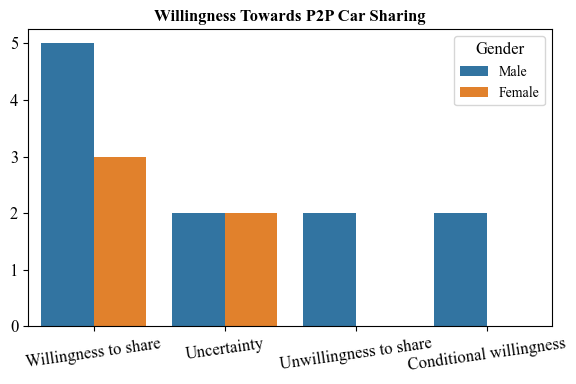

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Secondary Code',hue='Gender', data=willing_by_gender)
plt.title('Willingness Towards P2P Car Sharing')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=8)
plt.yticks(range(0, willing_by_gender['Secondary Code'].value_counts()[0]//2+2))
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('willingness_towards_car_sharing.png', dpi=300)  # 设置文件名和分辨率

In [47]:
# 2.Choice Towards Car Hiring vs Car Sharing 
Choice_df = df[df['Primary Code']=='Car hire vs. car sharing']
Choice_counts = Choice_df['Secondary Code'].fillna('No response').value_counts() # 默认dropna=True
# Choice_df.to_dict()
Choice_counts

Secondary Code
Case-by-case basis    11
No response            5
Car sharing            3
Name: count, dtype: int64

In [48]:
df[df['Primary Code']=='Car hire vs. car sharing']

,Theme,Primary Code,Secondary Code,Interviewee
8,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant1
25,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant2
46,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant3
60,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant4
75,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant5
96,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant6
112,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant7
133,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant8
156,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant9
172,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant10


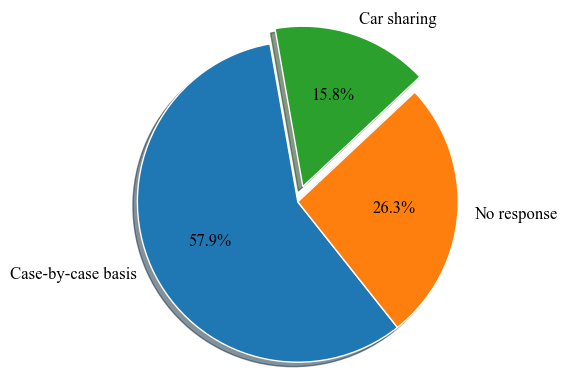

In [49]:
#plt.figure(figsize=(6, 6))
# 突出显示第一个扇区
explode = (0, 0, 0.1)
#shadow=True
plt.pie(Choice_counts, labels=Choice_counts.index, autopct='%1.1f%%', explode=explode, startangle=100,shadow=True,
        wedgeprops={'edgecolor': 'white'})
# plt.title('Choice Towards Car Hiring vs P2P Car Sharing')
plt.axis('equal')  # 保证饼图是圆形
plt.savefig('Choice Towards Car Hiring vs Car Sharing.png', dpi=300)  # 设置文件名和分辨率
plt.show() #show在前，savefig在后的话，保存的图片会是一片空白

In [50]:
# colors = ['gold','lightblue', 'lightgreen', 'lightcoral']
# labels = Choice_df.index

# # 突出显示第一个扇区
# explode = (0.1, 0, 0, 0)

# # 绘制饼图
# plt.figure(figsize=(6, 6))
# plt.pie(Choice_df, colors=colors, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140, explode=explode,wedgeprops={'edgecolor': 'white'})
# plt.title('Distribution of Secondary Codes', fontsize=16)
# plt.axis('equal')  # 保证饼图是圆形

# # 添加图例
# # plt.legend(title='Seconday Code', loc='upper right')

# # 显示图形
# plt.show()

In [51]:
filtered_df['Primary Code'].value_counts()

Primary Code
Information preferences         59
Factors influencing decision    54
Pricing factors                 36
IoT and other technologies      35
Reasons for sharing             31
Concerns about sharing          29
Privacy concerns                26
Car hire vs. car sharing        19
Billing preferences             19
Name: count, dtype: int64

In [52]:
# 3.Separate Reasons and Concerns for Participating in Car Sharing
# reason_concern_df = df[df['Primary Code'].isin(['Reasons for sharing','Concerns about sharing'])]
reasons_df = df[df['Primary Code'] == 'Reasons for sharing']
concerns_df = df[df['Primary Code'] == 'Concerns about sharing']
concerns_df.head()

,Theme,Primary Code,Secondary Code,Interviewee
6,Car Sharing Attitudes,Concerns about sharing,Insurance,Participant1
7,Car Sharing Attitudes,Concerns about sharing,Trust in platform,Participant1
24,Car Sharing Attitudes,Concerns about sharing,NaN,Participant2
44,Car Sharing Attitudes,Concerns about sharing,Timetabling,Participant3
45,Car Sharing Attitudes,Concerns about sharing,Car condition,Participant3


In [53]:
concerns_df

,Theme,Primary Code,Secondary Code,Interviewee
6,Car Sharing Attitudes,Concerns about sharing,Insurance,Participant1
7,Car Sharing Attitudes,Concerns about sharing,Trust in platform,Participant1
24,Car Sharing Attitudes,Concerns about sharing,NaN,Participant2
44,Car Sharing Attitudes,Concerns about sharing,Timetabling,Participant3
45,Car Sharing Attitudes,Concerns about sharing,Car condition,Participant3
59,Car Sharing Attitudes,Concerns about sharing,Car condition,Participant4
72,Car Sharing Attitudes,Concerns about sharing,Timetabling,Participant5
73,Car Sharing Attitudes,Concerns about sharing,Trust in renters,Participant5
74,Car Sharing Attitudes,Concerns about sharing,Convenience,Participant5
95,Car Sharing Attitudes,Concerns about sharing,Car condition,Participant6


In [54]:
reasons_counts = reasons_df['Secondary Code'].value_counts().sort_values(ascending=False)
concerns_counts = concerns_df['Secondary Code'].value_counts().sort_values(ascending=False)

# # 设置画布大小
# plt.figure(figsize=(12, 6))

# # 绘制第一个条形图
# plt.subplot(1, 2, 1)
# sns.barplot(x=reasons_counts.index, y=reasons_counts.values) #, palette='viridis') # Blues
# plt.title('Reasons for sharing')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# # 绘制第二个条形图
# plt.subplot(1, 2, 2)
# sns.barplot(x=concerns_counts.index, y=concerns_counts.values) #, palette='viridis') # viridis
# plt.title('Concerns about sharing')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(rotation=45, ha='right')
# plt.yticks(range(0, concerns_counts.values.max() + 1))
# plt.tight_layout()

# plt.savefig('Reason and Concerns in Car Sharing Insights.png', dpi=300)  # 设置文件名和分辨率

# # 显示图形
# plt.show()

In [55]:
reason_concern_df = df[df['Primary Code'].isin(['Reasons for sharing','Concerns about sharing'])]
concerns_df.head()

,Theme,Primary Code,Secondary Code,Interviewee
6,Car Sharing Attitudes,Concerns about sharing,Insurance,Participant1
7,Car Sharing Attitudes,Concerns about sharing,Trust in platform,Participant1
24,Car Sharing Attitudes,Concerns about sharing,NaN,Participant2
44,Car Sharing Attitudes,Concerns about sharing,Timetabling,Participant3
45,Car Sharing Attitudes,Concerns about sharing,Car condition,Participant3


In [56]:
reason_concern_counts = reason_concern_df['Secondary Code'].value_counts().sort_values(ascending=False)
reason_concern_counts

Secondary Code
Utilization of idle resources    9
Extra income                     8
Car condition                    6
Insurance                        4
Sustainability                   4
Trust in platform                3
Trust in renters                 3
Positive sharing attitude        2
Timetabling                      2
Convenience                      1
Ease of use                      1
Privacy concerns                 1
Rental terms                     1
Fraud risk                       1
Legitimacy                       1
Name: count, dtype: int64

In [57]:
reason_concern_df.groupby('Primary Code')['Secondary Code'].count()

Primary Code
Concerns about sharing    21
Reasons for sharing       26
Name: Secondary Code, dtype: int64

In [58]:
reason_concern_df['Primary Code'].value_counts()

Primary Code
Reasons for sharing       31
Concerns about sharing    29
Name: count, dtype: int64

In [59]:
reason_concern_df

,Theme,Primary Code,Secondary Code,Interviewee
4,Car Sharing Attitudes,Reasons for sharing,Utilization of idle resources,Participant1
5,Car Sharing Attitudes,Reasons for sharing,Extra income,Participant1
6,Car Sharing Attitudes,Concerns about sharing,Insurance,Participant1
7,Car Sharing Attitudes,Concerns about sharing,Trust in platform,Participant1
22,Car Sharing Attitudes,Reasons for sharing,Car condition,Participant2
23,Car Sharing Attitudes,Reasons for sharing,Trust in platform,Participant2
24,Car Sharing Attitudes,Concerns about sharing,NaN,Participant2
41,Car Sharing Attitudes,Reasons for sharing,Utilization of idle resources,Participant3
42,Car Sharing Attitudes,Reasons for sharing,Extra income,Participant3
43,Car Sharing Attitudes,Reasons for sharing,Positive sharing attitude,Participant3


In [60]:
reason_concern_df['Primary Code'].unique()

array(['Reasons for sharing', 'Concerns about sharing'], dtype=object)

[9.0, 8.0, 2.0, 1.0, 2.0, 4.0, 4.0, 1.0, 5.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0]
6


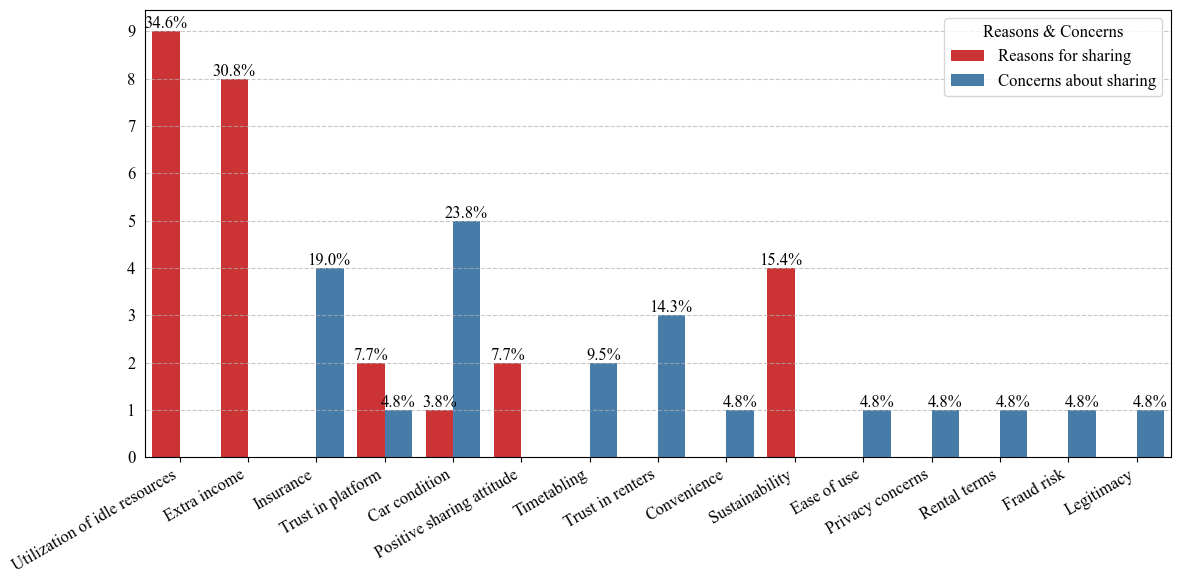

In [96]:
plt.figure(figsize=(12, 6))
custom_palette = sns.color_palette("Set1")

ax = sns.countplot(x='Secondary Code',hue='Primary Code', data=reason_concern_df, palette=custom_palette[:2])
# plt.title('Car Sharing Attitudes')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=30, ha='right')
plt.yticks(range(0, reason_concern_df['Secondary Code'].value_counts().max()+ 1))

# 计算每个 hue 下的总数
hue_counts = reason_concern_df.groupby('Primary Code')['Secondary Code'].count()
# 获取每个 bar 的高度
heights = [p.get_height() for p in ax.patches]
print(heights)
# 获取 hue 的标签
hues = reason_concern_df['Primary Code'].unique()
first_hue_length = len(reason_concern_df[reason_concern_df['Primary Code']== hues[0]]['Secondary Code'].dropna().unique())
print(first_hue_length)

for i, p in enumerate(ax.patches):
    # 计算百分比
    percentage = heights[i] / hue_counts.iloc[0 if i // first_hue_length else 1] * 100
    # 添加百分比标签
    if heights[i]!=0:  # 只在有数据的条形上添加标签
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',\
                    xytext=(0, 5), textcoords='offset points')


# 添加水平网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(left=False)

# 设置图例
plt.legend(title='Reasons & Concerns', fontsize='12')

plt.tight_layout()

plt.savefig('Car Sharing Attitudes.png', dpi=300)  # 设置文件名和分辨率

# 显示图形
plt.show()


In [62]:
# 4.Factors influencing decisions 放在一个图里
decision_factors_df = df[df['Primary Code']=='Factors influencing decision']
decision_factors_counts=decision_factors_df['Secondary Code'].value_counts()
decision_factors_counts

Secondary Code
Price                              12
Convenience                         7
Accessibility of service points     6
Car condition                       6
Sense of community                  2
Ease of use                         2
Insurance                           2
Timetabling                         2
Service quality                     2
Flexibility                         2
Membership                          1
Safety                              1
Legitimacy                          1
Payment                             1
Reviews                             1
Car history                         1
Name: count, dtype: int64

In [63]:
decision_factors_df

,Theme,Primary Code,Secondary Code,Interviewee
9,Decision-Making Factors,Factors influencing decision,Convenience,Participant1
10,Decision-Making Factors,Factors influencing decision,Price,Participant1
11,Decision-Making Factors,Factors influencing decision,Membership,Participant1
12,Decision-Making Factors,Factors influencing decision,Sense of community,Participant1
26,Decision-Making Factors,Factors influencing decision,Price,Participant2
27,Decision-Making Factors,Factors influencing decision,Accessibility of service points,Participant2
47,Decision-Making Factors,Factors influencing decision,NaN,Participant3
61,Decision-Making Factors,Factors influencing decision,NaN,Participant4
76,Decision-Making Factors,Factors influencing decision,Ease of use,Participant5
77,Decision-Making Factors,Factors influencing decision,Safety,Participant5


In [64]:
Choice_df

,Theme,Primary Code,Secondary Code,Interviewee
8,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant1
25,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant2
46,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant3
60,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant4
75,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant5
96,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant6
112,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant7
133,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant8
156,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant9
172,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant10


In [65]:
choice_factor_merged_df=pd.merge(Choice_df,decision_factors_df,on='Interviewee')
choice_factor_merged_df

,Theme_x,Primary Code_x,Secondary Code_x,Interviewee,Theme_y,Primary Code_y,Secondary Code_y
0,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant1,Decision-Making Factors,Factors influencing decision,Convenience
1,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant1,Decision-Making Factors,Factors influencing decision,Price
2,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant1,Decision-Making Factors,Factors influencing decision,Membership
3,Decision-Making Factors,Car hire vs. car sharing,Car sharing,Participant1,Decision-Making Factors,Factors influencing decision,Sense of community
4,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant2,Decision-Making Factors,Factors influencing decision,Price
5,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant2,Decision-Making Factors,Factors influencing decision,Accessibility of service points
6,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant3,Decision-Making Factors,Factors influencing decision,NaN
7,Decision-Making Factors,Car hire vs. car sharing,NaN,Participant4,Decision-Making Factors,Factors influencing decision,NaN
8,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant5,Decision-Making Factors,Factors influencing decision,Ease of use
9,Decision-Making Factors,Car hire vs. car sharing,Case-by-case basis,Participant5,Decision-Making Factors,Factors influencing decision,Safety


In [66]:
counts = choice_factor_merged_df.groupby(['Secondary Code_x', 'Secondary Code_y']).size().reset_index(name='num')
display(counts)
display(type(counts))

,Secondary Code_x,Secondary Code_y,num
0,Car sharing,Accessibility of service points,1
1,Car sharing,Convenience,1
2,Car sharing,Membership,1
3,Car sharing,Payment,1
4,Car sharing,Price,2
5,Car sharing,Sense of community,1
6,Car sharing,Timetabling,2
7,Case-by-case basis,Accessibility of service points,5
8,Case-by-case basis,Car condition,6
9,Case-by-case basis,Car history,1


pandas.core.frame.DataFrame

In [67]:
# # get the totals for each row
# totals = counts.sum(axis=1)
# totals

In [68]:
# counts.apply(lambda x: x / x.sum(), axis=1) * 100

In [69]:
# # calculate the percent for each row
# # percent = counts.div(totals, axis=0).mul(100).round(2)
# percent = counts.iloc[:, :].apply(lambda x: x / x.sum(), axis=1) * 100

# # set palette
# custom_palette = sns.color_palette("tab20")

# # create the plot
# ax = percent.plot(kind='barh', stacked=True, figsize=(10, 5),xticks=[],color=custom_palette) # color=['green', 'gray']
# print(type(ax))
# # move the legend
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False)


# # remove ticks
# ax.tick_params(left=False, bottom=False)
# # remove all spines
# ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

# # iterate through each container
# for c in ax.containers:
    
#     # custom label calculates percent and add an empty string so 0 value bars don't have a number
#     labels = [f'{w:0.2f}%' if(w:= v.get_width())>0 else ''for v in c]
    
#     # add annotations
#     ax.bar_label(c, labels=labels, label_type='center', padding=0.2,fontsize=10) #, color='w'

# plt.ylabel('')
# plt.tight_layout()
# #plt.savefig('Pricing Factors by Billing Preferences百分比版.png', dpi=300, bbox_inches='tight')  # 设置文件名和分辨率
# plt.show();

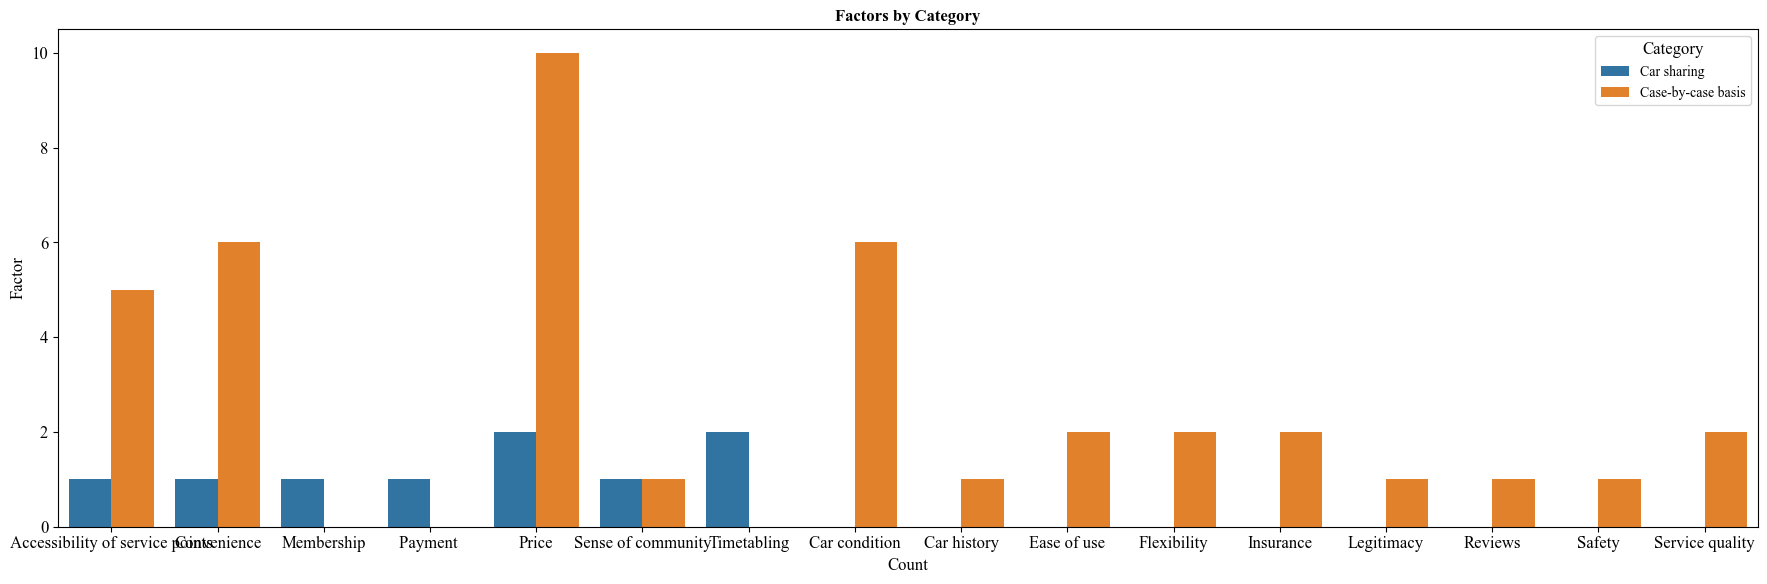

In [70]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Secondary Code_y', y='num', hue='Secondary Code_x', data=counts)
plt.title('Factors by Category')
plt.xlabel('Count')
plt.ylabel('Factor')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

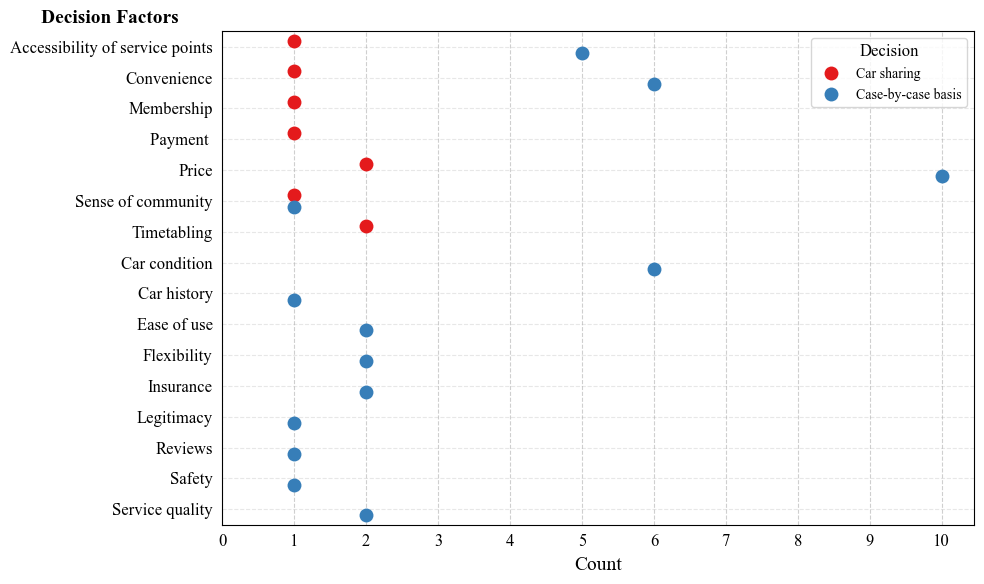

In [71]:
# 创建点图
plt.figure(figsize=(10, 6))

ax = sns.stripplot(x='num', y='Secondary Code_y', hue='Secondary Code_x', data=counts, dodge=True, jitter=True, palette='Set1',size=10)

# 设置标题和标签
plt.title('Decision Factors', fontsize=14, x=-0.15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('', fontsize=14)

# 移动图例到上方
plt.legend(title='Decision')#, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.3)
#plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, counts['num'].max() +1))

ax.tick_params(left=False, bottom=False)

# 显示图形
plt.tight_layout()
plt.savefig('Decision Factors.png', dpi=300)  # 设置文件名和分辨率
plt.show()

In [72]:
# plt.figure(figsize=(12, 6))
# plt.plot(counts['num'], counts['Secondary Code_y'], 'o',markersize=10)
#          # , markerfacecolor='red')
# plt.title('Decision Factors', x= -0.1, fontsize=14) #y=-0.1
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(range(0, decision_factors_counts.max() +1))
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.savefig('Decision Factors.png', dpi=300)  # 设置文件名和分辨率
# plt.show()

In [73]:
# 5. research question 1
billing_df = df[df['Theme']=='Billing and Pricing Preferences'].drop(columns='Theme')
display(len(billing_df))
display(billing_df)

55

,Primary Code,Secondary Code,Interviewee
13,Billing preferences,Time-based charging,Participant1
14,Pricing factors,Duration,Participant1
28,Billing preferences,Usage-based charging,Participant2
29,Pricing factors,Cost-benefit analysis,Participant2
30,Pricing factors,Driving distance,Participant2
48,Billing preferences,Kilometer-based charging,Participant3
49,Pricing factors,Going rate,Participant3
50,Pricing factors,Cost-benefit analysis,Participant3
62,Billing preferences,Day-based charging,Participant4
63,Pricing factors,Freedom,Participant4


In [74]:
billing_prefer = billing_df[billing_df['Primary Code']=='Billing preferences'].drop(columns='Primary Code')
billing_prefer

,Secondary Code,Interviewee
13,Time-based charging,Participant1
28,Usage-based charging,Participant2
48,Kilometer-based charging,Participant3
62,Day-based charging,Participant4
83,Usage-based charging,Participant5
98,Usage-based charging,Participant6
115,Kilometer-based charging,Participant7
137,Day-based charging,Participant8
158,Usage-based charging,Participant9
174,Kilometer-based charging,Participant10


In [75]:
pricing_factors = billing_df[billing_df['Primary Code']=='Pricing factors'].drop(columns='Primary Code')
pricing_factors

,Secondary Code,Interviewee
14,Duration,Participant1
29,Cost-benefit analysis,Participant2
30,Driving distance,Participant2
49,Going rate,Participant3
50,Cost-benefit analysis,Participant3
63,Freedom,Participant4
84,NaN,Participant5
99,Cost-benefit analysis,Participant6
116,Cost-benefit analysis,Participant7
117,Driving distance,Participant7


In [76]:
billing_merged_df = billing_prefer.merge(pricing_factors, on='Interviewee').sort_values(by='Secondary Code_x').rename(
    columns={'Secondary Code_x':'Billing preferences','Secondary Code_y':'pricing_factors'})
display(len(billing_merged_df))
display(billing_merged_df)

36

,Billing preferences,Interviewee,pricing_factors
25,Day-based charging,Participant16,Ease of management
23,Day-based charging,Participant14,Rental demands
22,Day-based charging,Participant14,Car condition
21,Day-based charging,Participant14,Cost-benefit analysis
26,Day-based charging,Participant16,Car condition
5,Day-based charging,Participant4,Freedom
31,Day-based charging,Participant18,Driving distance
30,Day-based charging,Participant18,Budget analysis
27,Day-based charging,Participant16,Rental demands
28,Day-based charging,Participant16,Cost-benefit analysis


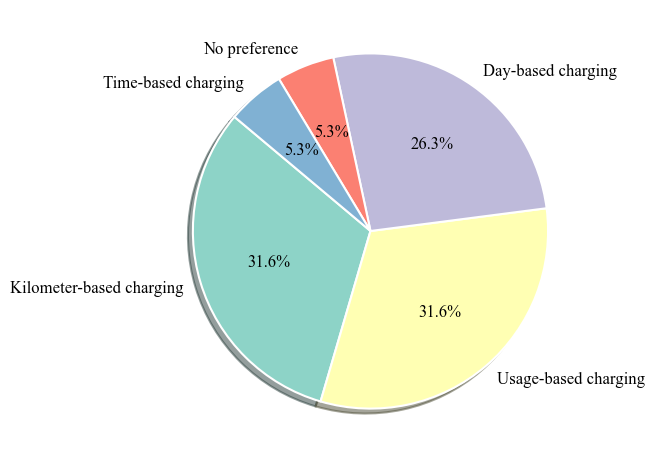

In [77]:
billing_merged_counts = billing_merged_df[['Billing preferences', 'Interviewee']].drop_duplicates()['Billing preferences'].value_counts()
colors = sns.color_palette('Set3')[0:len(billing_merged_counts)]

#explode = [0.1] + [0] * (len(billing_merged_counts) - 1)

plt.pie(billing_merged_counts, labels=billing_merged_counts.index, autopct='%1.1f%%', #explode=explode, 
        startangle=140,shadow=True,
        colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
# 添加图例
# plt.legend(title='Billing Preferences', bbox_to_anchor=(1, 0.5), loc='center left', fontsize='10')


plt.tight_layout() 
plt.savefig('Billing Preference.png', dpi=300, bbox_inches='tight')  # 设置文件名和分辨率

plt.show() #show在前，savefig在后的话，保存的图片会是一片空白

In [78]:
billing_merged_df.head()

,Billing preferences,Interviewee,pricing_factors
25,Day-based charging,Participant16,Ease of management
23,Day-based charging,Participant14,Rental demands
22,Day-based charging,Participant14,Car condition
21,Day-based charging,Participant14,Cost-benefit analysis
26,Day-based charging,Participant16,Car condition


In [79]:
billing_merged_df.groupby(['Billing preferences', 'pricing_factors']).size()

Billing preferences       pricing_factors      
Day-based charging        Budget analysis          2
                          Car condition            2
                          Cost-benefit analysis    2
                          Driving distance         1
                          Ease of management       1
                          Freedom                  1
                          Going rate               1
                          Rental demands           2
Kilometer-based charging  Cost-benefit analysis    3
                          Driving distance         1
                          Fairness                 2
                          Going rate               2
No preference             Car condition            1
                          Cost-benefit analysis    1
                          Owner accessibility      1
Time-based charging       Duration                 1
Usage-based charging      Car condition            2
                          Cost-benefit analysis    

In [80]:
display(counts)

,Secondary Code_x,Secondary Code_y,num
0,Car sharing,Accessibility of service points,1
1,Car sharing,Convenience,1
2,Car sharing,Membership,1
3,Car sharing,Payment,1
4,Car sharing,Price,2
5,Car sharing,Sense of community,1
6,Car sharing,Timetabling,2
7,Case-by-case basis,Accessibility of service points,5
8,Case-by-case basis,Car condition,6
9,Case-by-case basis,Car history,1


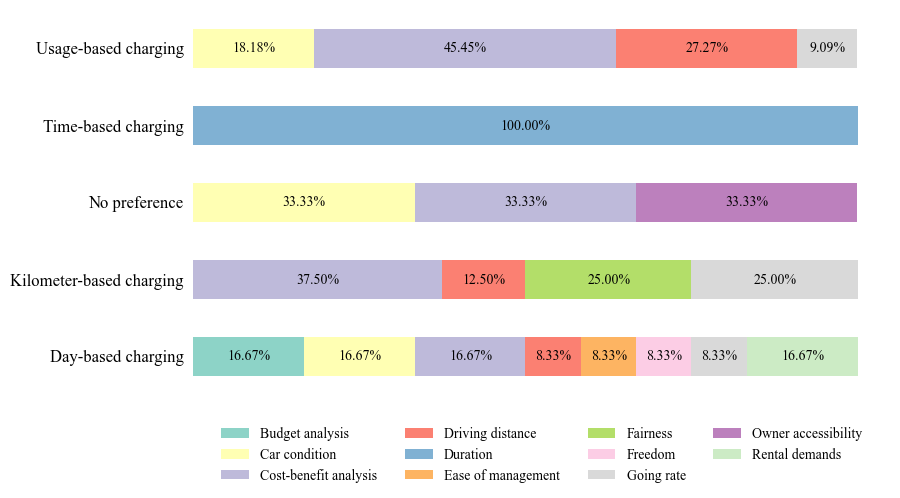

In [81]:
counts = billing_merged_df.groupby(['Billing preferences', 'pricing_factors']).size().unstack(fill_value=0)

# get the totals for each row
totals = counts.sum(axis=1)
# calculate the percent for each row
percent = counts.div(totals, axis=0).mul(100).round(2)
# df_perc = df.iloc[:, :].apply(lambda x: x / x.sum(), axis=1) * 100
# set palette
custom_palette = sns.color_palette("Set3")

# create the plot
ax = percent.plot(kind='barh', stacked=True, figsize=(9, 5),xticks=[],color=custom_palette) # color=['green', 'gray']
# move the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False)


# remove ticks
ax.tick_params(left=False, bottom=False)
# remove all spines
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

# iterate through each container
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, fontsize=10) #, color='w'

plt.ylabel('')
# plt.tight_layout()
plt.savefig('Pricing Factors by Billing Preferences百分比版.png', dpi=300, bbox_inches='tight')  # 设置文件名和分辨率
plt.show();

In [82]:
# counts = billing_merged_df.groupby(['Billing preferences', 'pricing_factors']).size().unstack(fill_value=0)
# plt.figure(figsize=(12, 6))
# # 绘制分组条形图
# # colors = plt.colormaps.get_cmap('Set3')(range(len(counts.columns))) # tab20c不错 Set3也是
# # custom_palette = sns.color_palette("Set3")

# ax =counts.plot(kind='bar', stacked=True, edgecolor='white') # , color=custom_palette)
# plt.title('Pricing Factors by Billing Preferences')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(rotation=15, ha='right')
# plt.legend(title='Pricing Factors', bbox_to_anchor=(1, 1))
# # plt.tight_layout()
# plt.savefig('Pricing Factors by Billing Preferences.png', dpi=300, bbox_inches='tight')  # 设置文件名和分辨率
# plt.show();

In [83]:
# 7. research question 2
privacy_info_df = df[df['Theme']=='Privacy and Information Needs'].drop(columns='Theme')
display(len(privacy_info_df))
display(privacy_info_df)

85

,Primary Code,Secondary Code,Interviewee
15,Privacy concerns,No privacy concern,Participant1
16,Information preferences,Trust in platform,Participant1
31,Privacy concerns,Trust in platform,Participant2
32,Information preferences,Car condition,Participant2
33,Information preferences,Smoking awareness,Participant2
...,...,...,...
377,Information preferences,Rental terms,Participant19
378,Information preferences,Renter profile,Participant19
379,Information preferences,License,Participant19
380,Information preferences,Car usage,Participant19


In [84]:
privacy_df = privacy_info_df[privacy_info_df['Primary Code']=='Privacy concerns']
privacy_merged_df = privacy_df.merge(interviewee, on='Interviewee')
display(privacy_merged_df.shape)
display(privacy_merged_df)

(26, 6)

,Primary Code,Secondary Code,Interviewee,Car Ownership,Role,Gender
0,Privacy concerns,No privacy concern,Participant1,Yes,Employed,Male
1,Privacy concerns,Trust in platform,Participant2,Yes,Employed,Male
2,Privacy concerns,No privacy concern,Participant3,Yes,Employed,Male
3,Privacy concerns,NaN,Participant4,Yes,Employed,Male
4,Privacy concerns,Home address,Participant5,Yes,Employed,Female
5,Privacy concerns,Neighborhood Disturbance,Participant5,Yes,Employed,Female
6,Privacy concerns,No privacy concern,Participant6,Yes,Student,Male
7,Privacy concerns,NaN,Participant7,Yes,Employed,Male
8,Privacy concerns,Data access,Participant8,Yes,Employed,Female
9,Privacy concerns,Data security,Participant8,Yes,Employed,Female


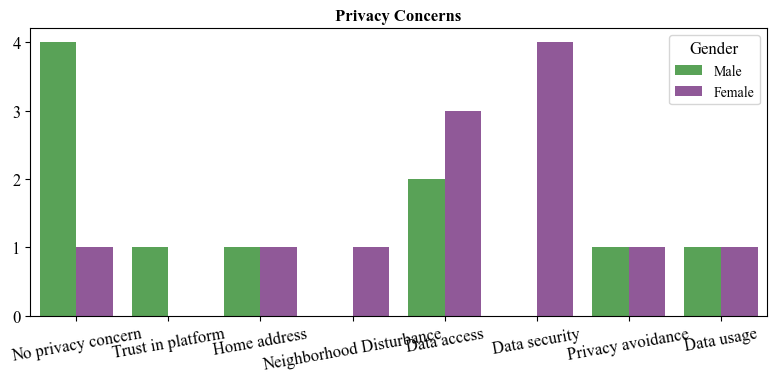

In [85]:
plt.figure(figsize=(8, 4))
# palette = sns.color_palette("pastel")
custom_palette = sns.color_palette("Set1")
sns.countplot(x='Secondary Code',hue='Gender', data=privacy_merged_df, palette=custom_palette[2:4])
plt.title('Privacy Concerns')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=10)
plt.yticks(range(0, privacy_merged_df['Secondary Code'].value_counts().max()//2 + 3))
plt.legend(title='Gender')
# 增加网格线
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
#plt.savefig('willing_towards_car_sharing.png', dpi=300)  # 设置文件名和分辨率

In [86]:
info_df = privacy_info_df[privacy_info_df['Primary Code']=='Information preferences']
info_df

,Primary Code,Secondary Code,Interviewee
16,Information preferences,Trust in platform,Participant1
32,Information preferences,Car condition,Participant2
33,Information preferences,Smoking awareness,Participant2
34,Information preferences,Trust in platform,Participant2
35,Information preferences,Reviews,Participant2
52,Information preferences,Contact information,Participant3
65,Information preferences,Renter profile,Participant4
87,Information preferences,Renter profile,Participant5
88,Information preferences,Trust in platform,Participant5
101,Information preferences,Renter profile,Participant6


In [87]:
# # 设置画布大小
# # plt.figure(figsize=(14, 5))
# fig = plt.figure(figsize=(16, 6))

# colors = plt.cm.get_cmap('Set2')(range(10)) # tab20c不错 Set3也是


# # 绘制第一个条形图
# ax1 = fig.add_axes([0.05, 0.1, 0.3, 0.6]) # [left, bottom, width, height]
# # plt.subplot(1, 2, 1)
# sns.countplot(x='Secondary Code', data=privacy_merged_df,color=colors[0])
# plt.title('Privacy Concerns')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(rotation=20, ha='right')
# # 增加网格线
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# # plt.tight_layout()



# # 绘制第二个条形图
# ax2 = fig.add_axes([0.4, 0.1, 0.55, 0.8]) 
# # plt.subplot(1, 2, 2)
# sns.countplot(x='Secondary Code', data=info_df, color=colors[2]) 
# plt.title('Information preferences')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(rotation=20, ha='right')
# plt.yticks(range(0, info_df['Secondary Code'].value_counts().max()+1))
# # 增加网格线
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# # plt.tight_layout()

# plt.savefig('Privacy and Information Needs.png', dpi=300, bbox_inches='tight')  # 设置文件名和分辨率

# # 显示图形
# plt.show()

Axes(0.125,0.11;0.775x0.77)
22


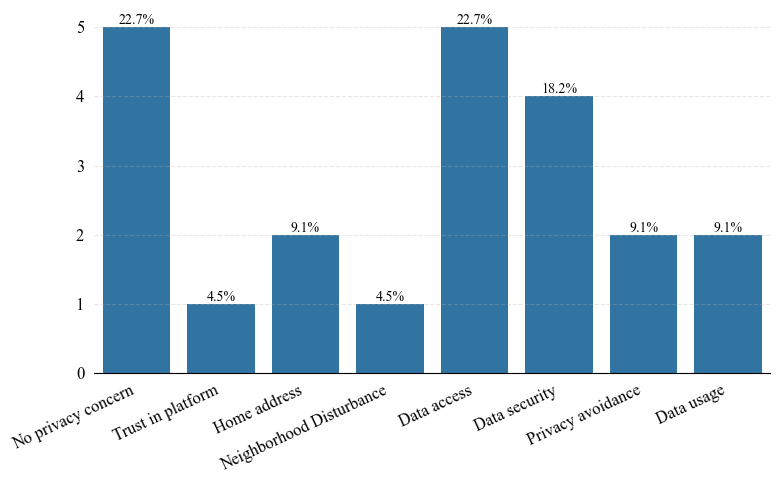

In [88]:
# simple_palette = ['#A0CBE8', '#FFBE7D', '#59A14F', '#8CD17D']

plt.figure(figsize=(8, 5))
ax= sns.countplot(x='Secondary Code', data=privacy_merged_df)
print(ax)
# plt.title('Privacy Concerns')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=25, ha='right')
# 增加网格线
plt.grid(axis='y', linestyle='--', alpha=0.3)

total= len(privacy_merged_df['Secondary Code'].dropna()) # similar to: privacy_merged_df['Secondary Code'].count()
print(total)

# 在条形上添加百分比标签
for bar in ax.patches:
    # 获取每个条形的高度
    height = bar.get_height()
    # 计算百分比
    percentage = f'{height / total:.1%}'
    # 设置标签位置
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    # 添加标签
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10)
    
ax.tick_params(left=False, bottom=False)
ax.spines[['top', 'left', 'right']].set_visible(False)
plt.tight_layout()
plt.savefig('Privacy concern.png', dpi=300)  # Set the file name and resolution 设置文件名和分辨率
plt.show()


Axes(0.125,0.11;0.775x0.77)
57


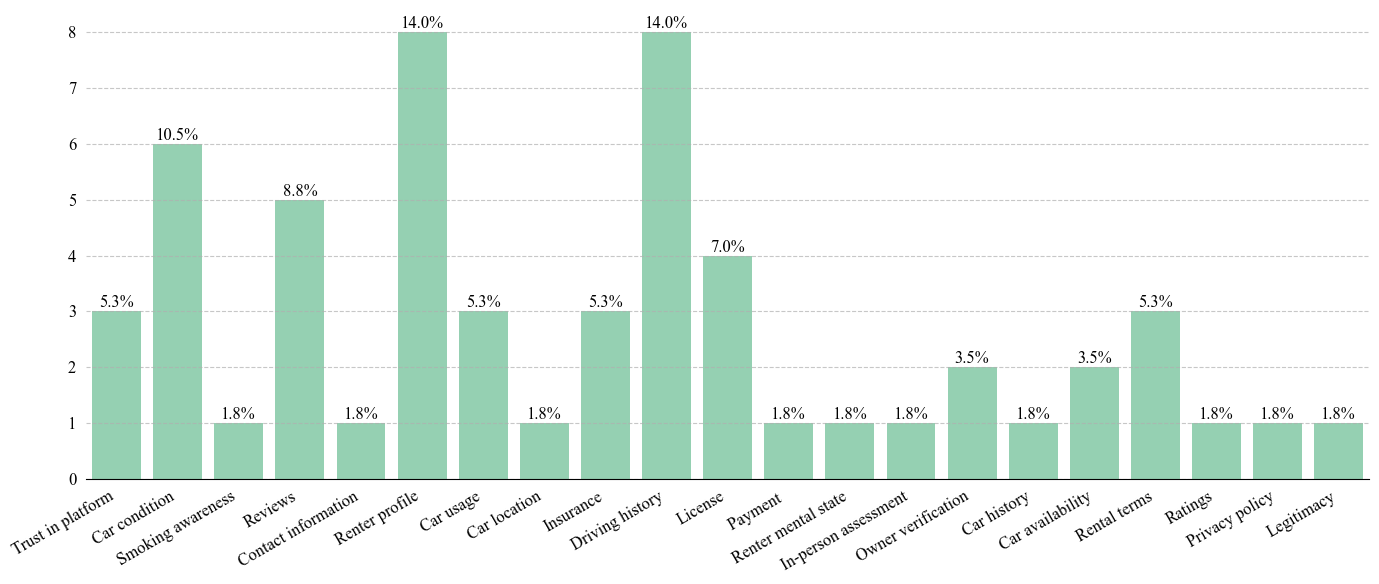

In [89]:
plt.figure(figsize=(14, 6))
custom_palette = sns.color_palette("mako")
ax = sns.countplot(x='Secondary Code', data=info_df, color = custom_palette[5]) #palette=custom_palette[3:4]) #, edgecolor='black') 
print(ax)
# plt.title('Information Preferences')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=30, ha='right')
plt.yticks(range(0, info_df['Secondary Code'].value_counts().max()+1))
# 增加网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

total = len(info_df['Secondary Code'].dropna())
print(total)
for bar in ax.patches:
    height = bar.get_height()
    percentage = f'{height/total:.1%}'
    x=bar.get_x() + bar.get_width() / 2
    plt.text(x, height, percentage, ha='center', va='bottom')

ax.tick_params(left=False, bottom=False)
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.savefig('Information Preference.png', dpi=300, bbox_inches='tight')  # 设置文件名和分辨率
plt.tight_layout()
# 显示图形
plt.show()

In [90]:
# 8. research question 3: IoT and Other Technologies
IoT_count = df[df['Theme']=='Technology in Car Sharing']['Secondary Code'].value_counts().sort_values()
# 如果不加sort_values，最后的图就会按照bar从短到长的排列
display(len(IoT_count))
display(IoT_count)

7

Secondary Code
Apple ID or Google ID integration     1
Emergency response                    1
Data transfer                         2
Contactless access                    5
Driving behavior tracking             6
Issue detection                       7
Car tracking                         10
Name: count, dtype: int64

In [91]:
df[df['Theme']=='Technology in Car Sharing'][['Secondary Code','Interviewee']]

,Secondary Code,Interviewee
17,NaN,Participant1
36,NaN,Participant2
53,Apple ID or Google ID integration,Participant3
66,Car tracking,Participant4
89,Car tracking,Participant5
104,Driving behavior tracking,Participant6
124,Driving behavior tracking,Participant7
125,Issue detection,Participant7
146,Data transfer,Participant8
147,Driving behavior tracking,Participant8


<class 'matplotlib.container.BarContainer'>


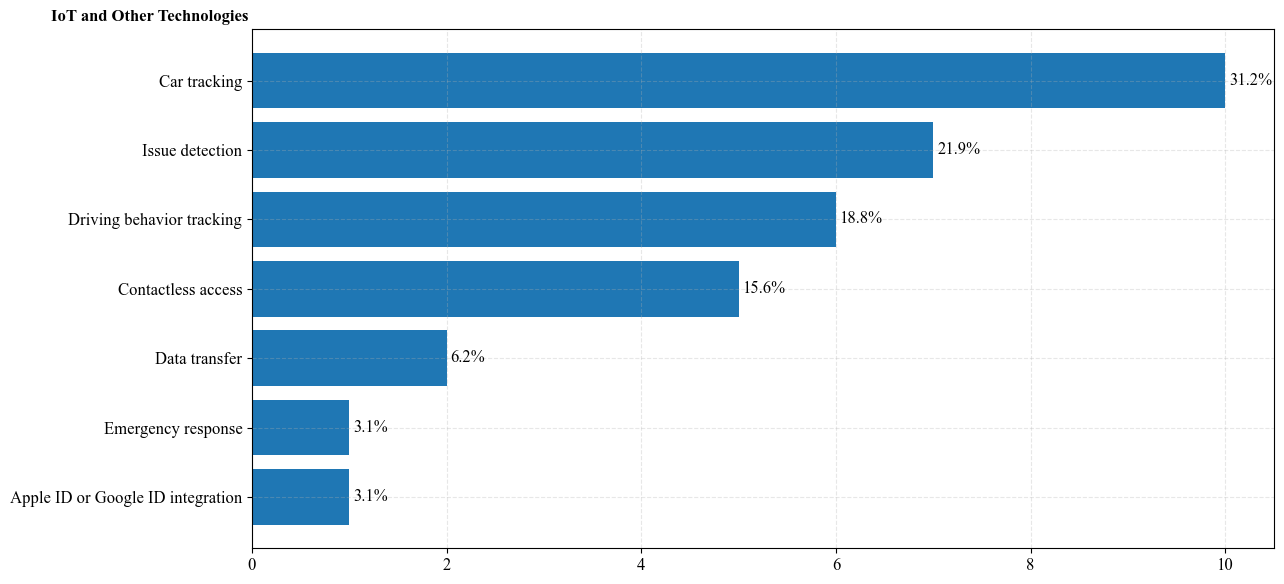

In [92]:
plt.figure(figsize=(13, 6))

# Plot Horizontal Bars 绘制水平条形图
bars = plt.barh(IoT_count.index, IoT_count.values)
print(type(bars))
plt.xlabel('')
plt.title('IoT and Other Technologies', x=-0.1)

# Calculate totals in order to calculate percentages 计算总数以便计算百分比
total = sum(IoT_count)

# Add percentage labels to each bar 在每个条形上添加百分比标签
for bar in bars:
    width = bar.get_width()
    percentage = (width / total) * 100
    plt.text(width+0.04, bar.get_y() + bar.get_height() / 2,
             f'{percentage:.1f}%', va='center', ha='left')

plt.grid(True, linestyle='--', alpha=0.3) # axis='x'

plt.tight_layout()

plt.savefig('IoT and Other Technologies Adoption.png', dpi=300)  # Set the file name and resolution 设置文件名和分辨率

plt.show()
